# Import librairies & data

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
from data import Data

In [108]:
df_neo = Data().get_neo_data()

/home/corentin/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (5,17,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [109]:
df_acc = Data().get_acc_data()

# Describe DataFrame

In [111]:
a = df_acc.isnull().sum()
a[a>1]

name              653
prefix            659
G                 657
M1                659
M2                659
K1                659
K2                659
PC                659
diameter          636
extent            657
albedo            639
rot_per           591
GM                657
BV                657
UB                657
IR                658
spec_B            650
spec_T            659
H_sigma           640
diameter_sigma    639
n_del_obs_used    604
n_dop_obs_used    604
two_body          659
A1                659
A2                648
A3                659
DT                659
dtype: int64

In [113]:
df_acc.shape

(659, 86)

In [114]:
df_neo[df_neo['neo']=='Y'][['spec_B', 'spec_T']].isnull().sum()

spec_B    18448
spec_T    18722
dtype: int64

In [110]:
df_neo['spec_B'].isnull().sum()

18478

In [115]:
def clean_spec(x):
    x = str(x).replace(':', '')
    x = str(x).replace('(IV)', '')
    return x

In [116]:
df_neo['spec_B_clean'] = df_neo['spec_B'].apply(clean_spec)

In [117]:
spec_counts = df_neo[['id', 'spec_B_clean']].groupby(['spec_B_clean']).count().reset_index()
spec_counts

,spec_B_clean,id
0,A,1
1,B,5
2,C,13
3,Cb,3
4,Cg,1
5,Ch,1
6,D,4
7,K,7
8,L,6
9,Ld,2


In [118]:
index_to_del = spec_counts[ spec_counts['spec_B_clean'] == 'nan' ].index

In [119]:
index_to_del

Int64Index([26], dtype='int64')

In [120]:
spec_counts.drop(index_to_del , inplace=True)

In [121]:
spec_counts

,spec_B_clean,id
0,A,1
1,B,5
2,C,13
3,Cb,3
4,Cg,1
5,Ch,1
6,D,4
7,K,7
8,L,6
9,Ld,2


In [135]:
pd.isnull(df_acc.loc[500, 'spec_B'])

True

In [136]:
spec_counts_acc = df_acc[['id', 'spec_B']].groupby(['spec_B']).count().reset_index()

In [137]:
spec_counts_acc

,spec_B,id
0,B,1
1,Cg,1
2,S,2
3,S(IV),1
4,S:,1
5,Sq,2
6,X,1


In [122]:
sum_spec = spec_counts['id'].sum()

In [123]:
spec_counts['per_spec'] = spec_counts['id'].apply(lambda x: x / sum_spec)

In [125]:
spec_counts['cum_perc_spec'] = spec_counts['per_spec'].cumsum()

In [126]:
from random import uniform

In [127]:
a = uniform(0,1)

for i in range(spec_counts.shape[0]):
    if a > spec_counts.loc[i, 'cum_perc_spec']:
        continue
    else:
        new_spec = spec_counts.loc[i, 'spec_B_clean']
        break
        
print(f'{a}: {new_spec} spec')

0.963315491472732: Xc spec


In [128]:
def new_spec_acc(x):
    a = uniform(0,1)

    for i in range(spec_counts.shape[0]):
        if a > spec_counts.loc[i, 'cum_perc_spec']:
            continue
        else:
            new_spec = spec_counts.loc[i, 'spec_B_clean']
            break
    return new_spec

In [45]:
df_acc['new_spec'] = df_acc['id'].apply(new_spec_acc)

In [46]:
df_acc['new_spec']

0      L
1      V
2      K
3      Q
4     Xe
5      X
6      V
7     Sa
8      Q
9     Sl
10     S
11    Sq
12     S
13     X
14     B
15     S
16    Sq
17    Xe
18     Q
19     L
20    Sq
21     S
22     S
23     V
24    Sq
25     S
26     S
27     C
28    Xc
29     V
30     S
31     T
32     B
33     C
34    Sq
35     Q
36     X
37     S
38     S
39     C
40     X
41    Cb
42     S
43    Sq
44     S
45    Sa
46    Sq
47    Xk
Name: new_spec, dtype: object

In [56]:
null_acc.columns

Index(['index', 0], dtype='object')

In [60]:
null_acc = df_acc.isnull().sum().reset_index()

['name',
 'prefix',
 'G',
 'M1',
 'M2',
 'K1',
 'K2',
 'PC',
 'extent',
 'GM',
 'BV',
 'UB',
 'IR',
 'spec_B',
 'spec_T',
 'two_body',
 'A1',
 'A2',
 'A3',
 'DT']

In [61]:
df_acc = df_acc.drop(columns=list(null_acc[null_acc[0] == 48]['index']))

In [73]:
df_acc['delta_v'] = df_acc['Min. delta-V [delta-V, dur.] (km/s), (d)'].apply(lambda x: float(x[:3]))

In [74]:
df_acc['delta_v']

0     5.0
1     5.2
2     3.5
3     5.8
4     4.6
5     5.6
6     5.5
7     5.9
8     4.2
9     5.4
10    5.6
11    5.4
12    5.9
13    5.3
14    4.5
15    5.6
16    5.5
17    5.1
18    5.8
19    5.1
20    5.9
21    5.1
22    5.3
23    5.9
24    5.8
25    5.8
26    5.3
27    5.3
28    5.1
29    5.0
30    5.9
31    5.7
32    5.9
33    5.4
34    5.3
35    5.5
36    4.7
37    5.6
38    5.8
39    5.4
40    5.9
41    5.3
42    5.1
43    4.8
44    5.3
45    5.3
46    5.9
47    4.2
Name: delta_v, dtype: float64

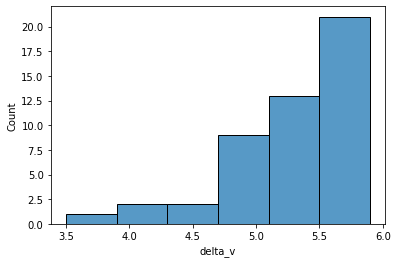

In [78]:
sns.histplot(df_acc['delta_v'], bins=6);

/home/corentin/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


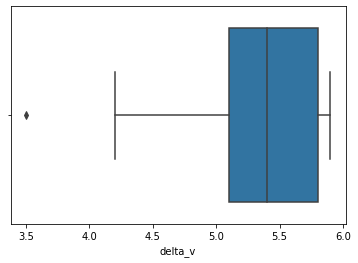

In [79]:
sns.boxplot(df_acc['delta_v']);

In [105]:
df_acc.columns

Index(['Unnamed: 0', 'id', 'spkid', 'full_name', 'pdes', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'rot_per', 'H_sigma', 'diameter_sigma',
       'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q',
       'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid',
       'moid_ld', 'moid_jup', 't_jup', 'sigma_e', 'sigma_a', 'sigma_q',
       'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n',
       'sigma_tp', 'sigma_per', 'class', 'producer', 'data_arc', 'first_obs',
       'last_obs', 'n_obs_used', 'n_del_obs_used', 'n_dop_obs_used',
       'condition_code', 'rms', 'Object', 'Orbit ID', 'H (mag)',
       'Estimated Diameter (m)', 'OCC',
       'Min. delta-V [delta-V, dur.] (km/s), (d)',
       'Min. Duration [delta-V, dur.] (km/s), (d)', 'Viable Trajectories',
       'Next Optical Opportunity (yyyy-mm [Vp])',
       'Next Goldstone Radar Opportunity (yyyy-mm [SNR])', 'new_spec',
       'delta_v', 'diameter_clean'],
      dtype

In [94]:
clean_diameter_acc('26 - 118')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [99]:
x = '26 - 118'

items = x.split('-')
    
items_new = []
for i in items:
    items_new.append(int(i.strip()))
        
items_new

[26, 118]

In [100]:
def clean_diameter_acc(x):
    items = x.split('-')
    
    items_new = []
    for i in items:
        items_new.append(int(i.strip()))
    
    return sum(items_new) / len(items_new)

In [101]:
df_acc.columns

Index(['Unnamed: 0', 'id', 'spkid', 'full_name', 'pdes', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'rot_per', 'H_sigma', 'diameter_sigma',
       'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q',
       'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid',
       'moid_ld', 'moid_jup', 't_jup', 'sigma_e', 'sigma_a', 'sigma_q',
       'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n',
       'sigma_tp', 'sigma_per', 'class', 'producer', 'data_arc', 'first_obs',
       'last_obs', 'n_obs_used', 'n_del_obs_used', 'n_dop_obs_used',
       'condition_code', 'rms', 'Object', 'Orbit ID', 'H (mag)',
       'Estimated Diameter (m)', 'OCC',
       'Min. delta-V [delta-V, dur.] (km/s), (d)',
       'Min. Duration [delta-V, dur.] (km/s), (d)', 'Viable Trajectories',
       'Next Optical Opportunity (yyyy-mm [Vp])',
       'Next Goldstone Radar Opportunity (yyyy-mm [SNR])', 'new_spec',
       'delta_v'],
      dtype='object')

In [102]:
df_acc['diameter_clean'] = df_acc['Estimated Diameter (m)'].apply(clean_diameter_acc)

<AxesSubplot:xlabel='diameter_clean', ylabel='Count'>

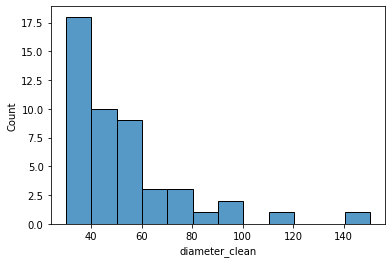

In [104]:
sns.histplot(df_acc.diameter_clean)

In [89]:
liste = [2, 3]
sum(liste) / len(liste)

2.5

In [81]:
b = '13 - 59'

In [83]:
d = ' 3'

In [85]:
int(d.strip())

3

In [82]:
c = b.split('-')
for i in c:
    i = int(i.strip())

['13 ', ' 59']

In [ ]:
Spectre = {
  '?': {},
  'A': {},
  'B': {
    'hydrogen': 0.235,
    'nitrogen': 0.001,
    'ammonia': 0.001,
    'iron': 10,
  },
  'C': {
    # from Keck report at http://www.kiss.caltech.edu/study/asteroid/asteroid_final_report.pdf
    'water': .2,
    'iron': .166,
    'nickel': .014,
    'cobalt': .002,

    # volatiles
    'hydrogen': 0.235,
    'nitrogen': 0.001,
    'ammonia': 0.001,
  },
  'Ch': {
    # from Keck report at http://www.kiss.caltech.edu/study/asteroid/asteroid_final_report.pdf
    'water': .2,
    'iron': .166,
    'nickel': .014,
    'cobalt': .002,

    # volatiles
    'hydrogen': 0.235,
    'nitrogen': 0.001,
    'ammonia': 0.001,
  },
  'Cg': {
    # from Keck report at http://www.kiss.caltech.edu/study/asteroid/asteroid_final_report.pdf
    'water': .2,
    'iron': .166,
    'nickel': .014,
    'cobalt': .002,

    # volatiles
    'hydrogen': 0.235,
    'nitrogen': 0.001,
    'ammonia': 0.001,
  },
  'Cgh': {
    # from Keck report at http://www.kiss.caltech.edu/study/asteroid/asteroid_final_report.pdf
    'water': .2,
    'iron': .166,
    'nickel': .014,
    'cobalt': .002,

    # volatiles
    'hydrogen': 0.235,
    'nitrogen': 0.001,
    'ammonia': 0.001,
  },
  'C type': {
    # from Keck report at http://www.kiss.caltech.edu/study/asteroid/asteroid_final_report.pdf
    'water': .2,
    'iron': .166,
    'nickel': .014,
    'cobalt': .002,

    # volatiles
    'hydrogen': 0.235,
    'nitrogen': 0.001,
    'ammonia': 0.001,
  },
  'Cb': {   # transition object between C and B
    # from Keck report at http://www.kiss.caltech.edu/study/asteroid/asteroid_final_report.pdf
    'water': .1,
    'iron': .083,
    'nickel': .007,
    'cobalt': .001,

    # volatiles
    'hydrogen': 0.235,
    'nitrogen': 0.001,
    'ammonia': 0.001,
  },
  'D': {
    'water': 0.000023,
  },
  'E': {

  },
  'K': {  # cross between S and C
    # from Keck report at http://www.kiss.caltech.edu/study/asteroid/asteroid_final_report.pdf
    'water': .1,
    'iron': .083,
    'nickel': .007,
    'cobalt': .001,

    # volatiles
    'hydrogen': 0.235,
    'nitrogen': 0.001,
    'ammonia': 0.001,
  },
  'L': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
    'aluminum': 7
  },
  'Ld': {  # copied from S
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  'M': {
    'iron': 88,
    'nickel': 10,
    'cobalt': 0.5,
  },
  'O': {
    'nickel-iron': 2.965,
    'platinum': 1.25,
  },
  'P': {  # correspond to CI, CM carbonaceous chondrites
    'water': 12.5,
  },
  'R': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  'S': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  # Sa, Sq, Sr, Sk, and Sl all transition objects (assume half/half)
  'Sa': {
    'magnesium silicate': 5e-31,
    'iron silicate': 0,
  },
  'Sq': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  'Sr': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  'Sk': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  'Sl': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  'S(IV)': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  'Q': {
    'nickel-iron': 13.315,
  },
  'R': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },
  'T': {
    'iron': 6,
  },
  'U': {

  },
  'V': {
    'magnesium silicate': 1e-30,
    'iron silicate': 0,
  },

  # TODO use density to decide what kind of X the object is?

  'X': {  # TODO these vals only apply to M-type within X
    'iron': 88,
    'nickel': 10,
    'cobalt': 0.5,
  },
  'Xe': {  # TODO these vals only apply to M-type within X
    'iron': 88,
    'nickel': 10,
    'cobalt': 0.5,
  },
  'Xc': {  # TODO these vals only apply to M-type within X
    'iron': 88,
    'nickel': 10,
    'cobalt': 0.5,
    'platinum': 0.005,
  },
  'Xk': {  # TODO these vals only apply to M-type within X
    'iron': 88,
    'nickel': 10,
    'cobalt': 0.5,
  },
  'comet': {
      # no estimates for now, because assumed mass, etc. would be off
  },
}